# my toolkit

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12.,6.)})
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# no nulls

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.duplicated().value_counts() # just check if there are duplicates.. later we'll think id drop them or no

False    1359
True      240
dtype: int64

In [8]:
# we're going to define, to look for patterns

# visualise the data

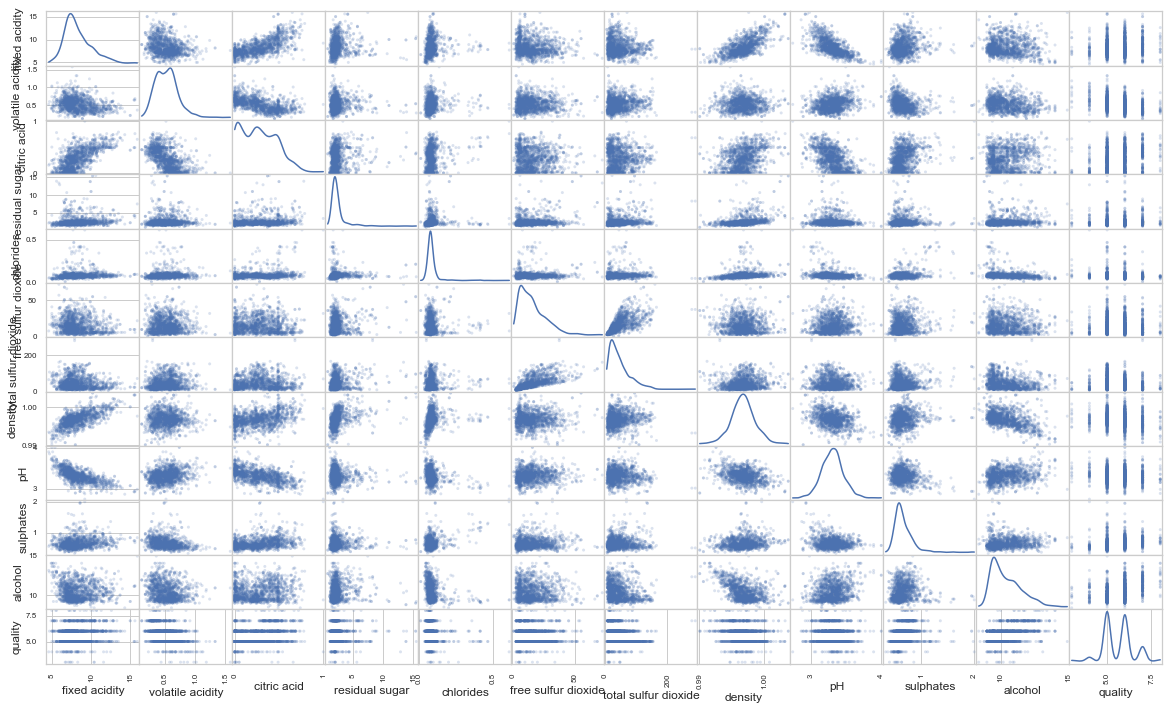

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2, figsize=(20,12), diagonal='kde');

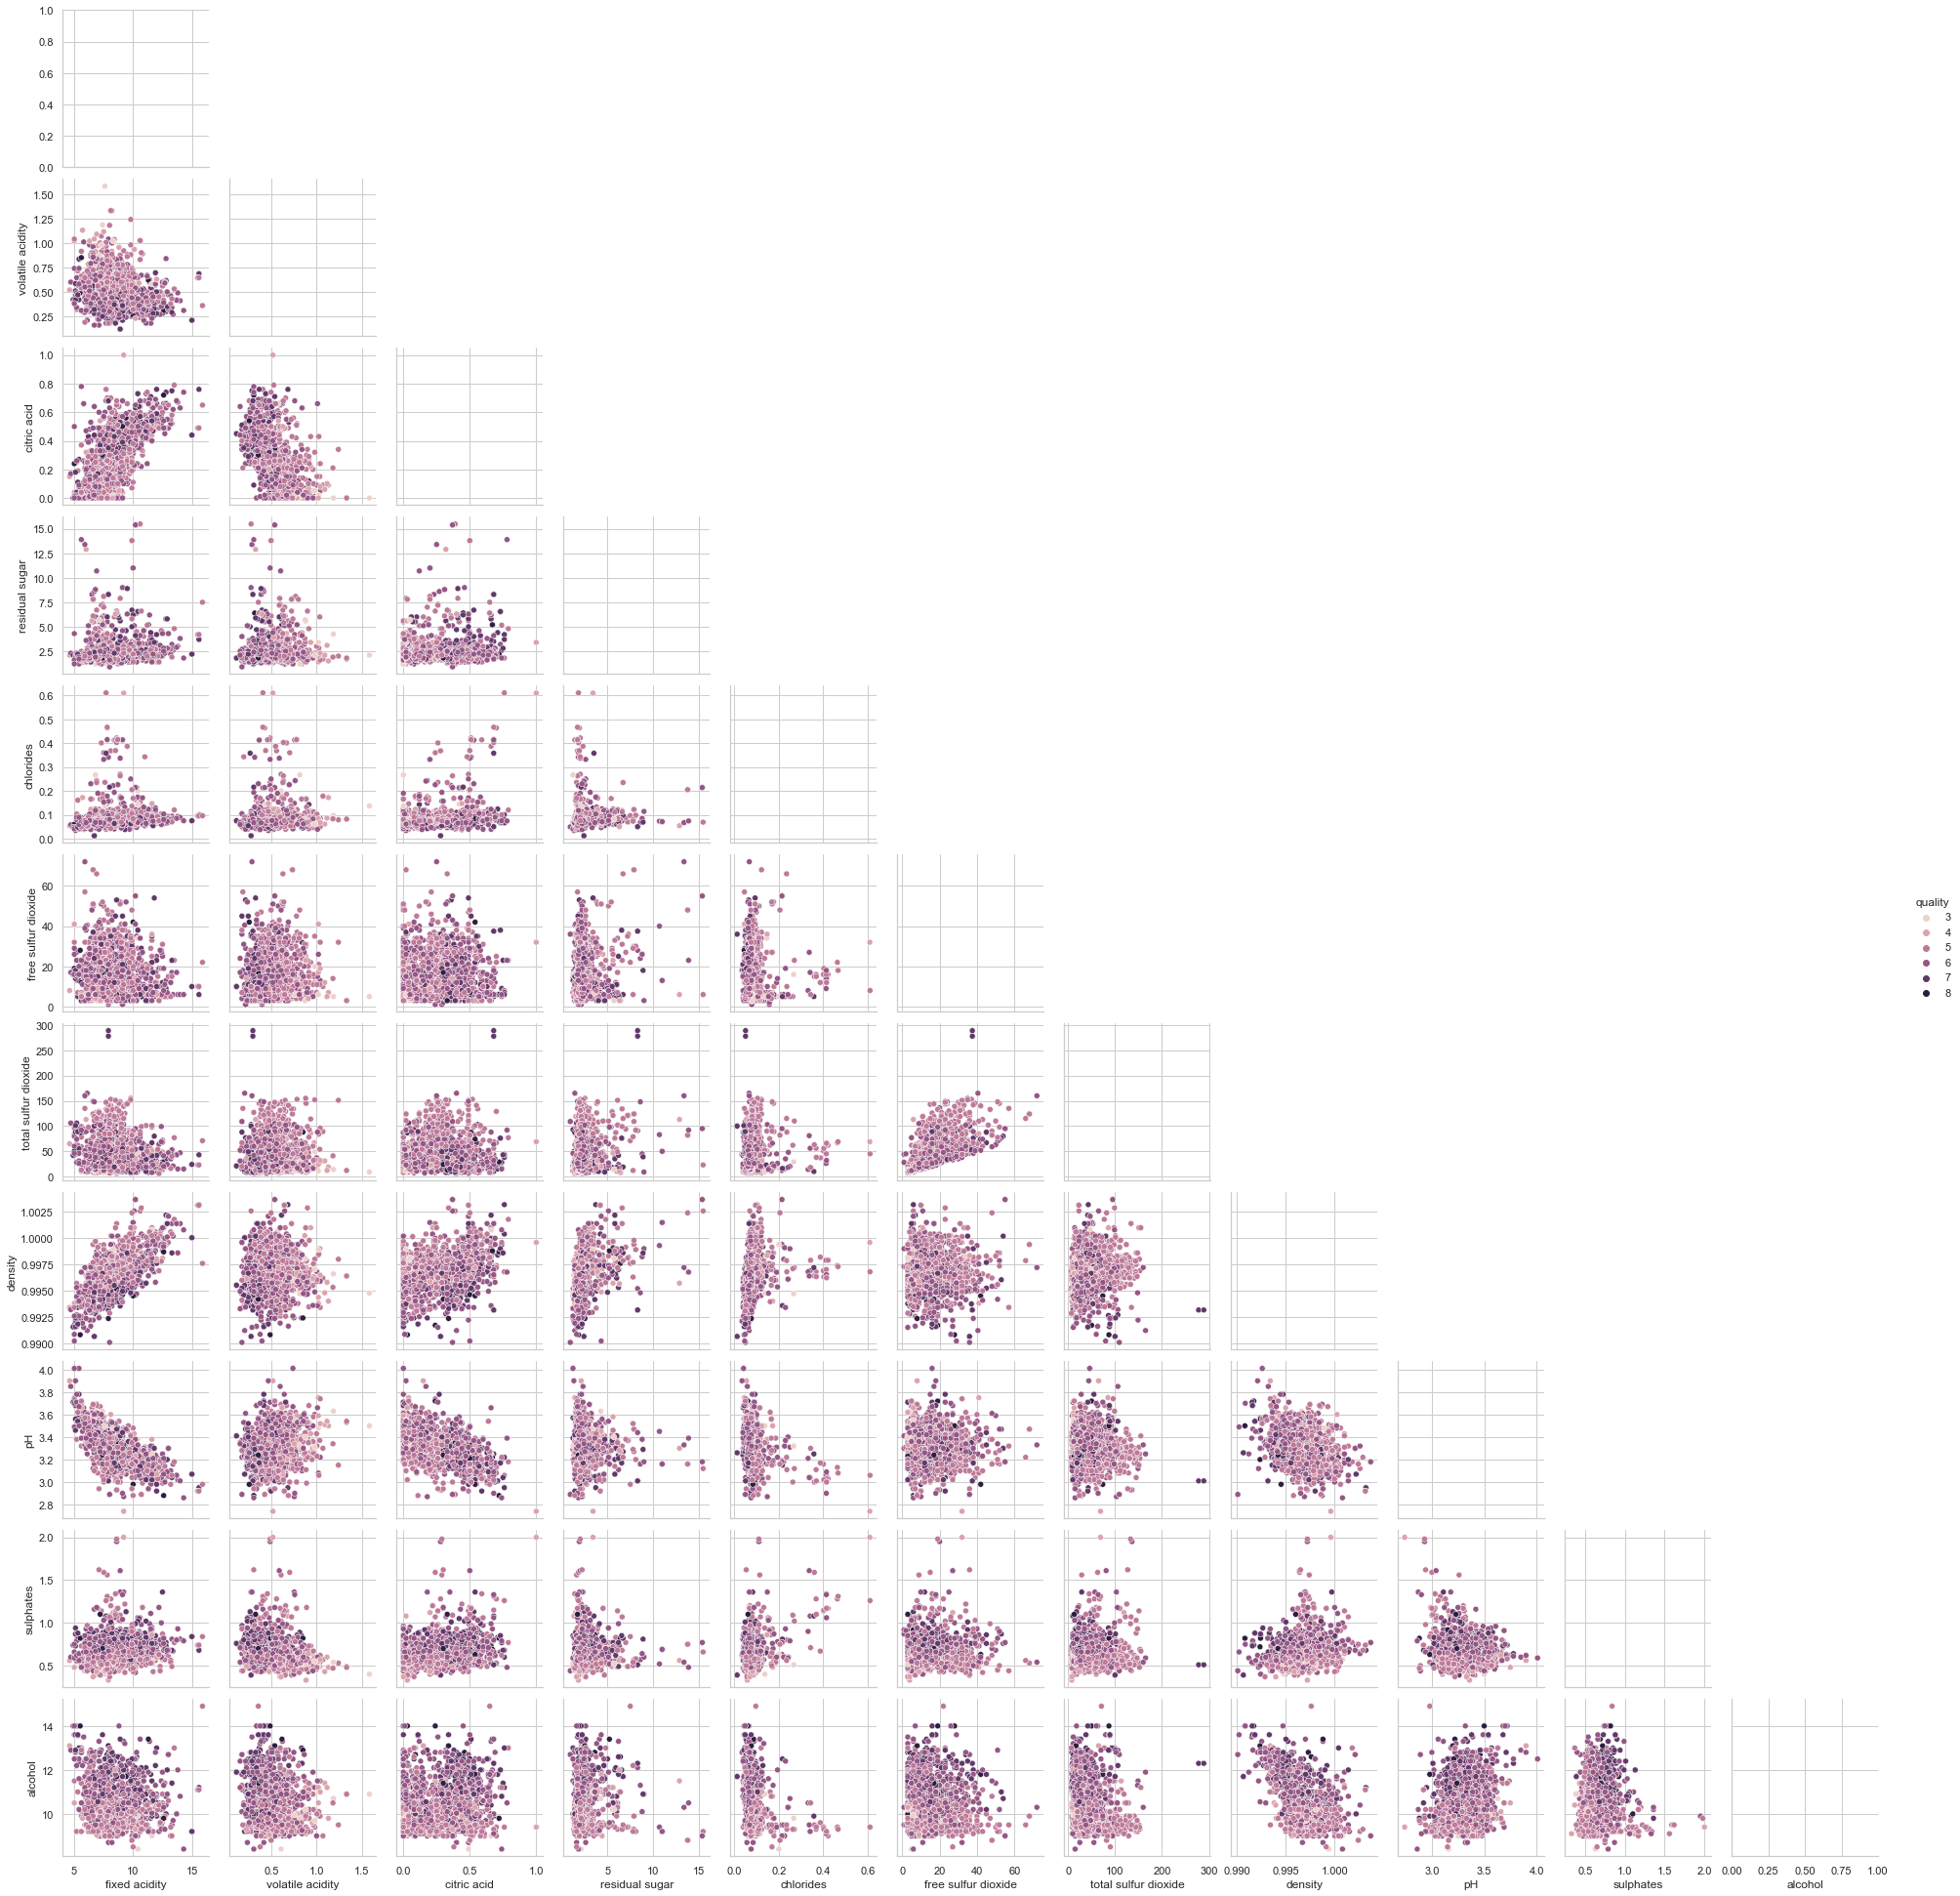

In [10]:
sns.pairplot(df, hue='quality', corner=True, diag_kind='None');

In [11]:
corre_matrix=df.corr()
corre_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


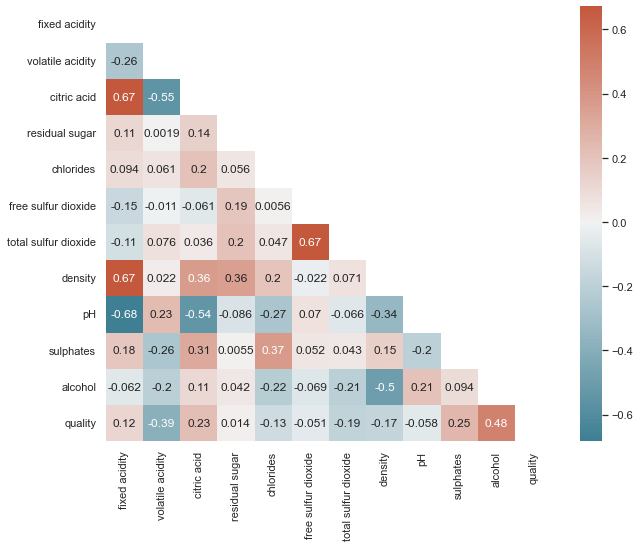

In [12]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True,);

In [13]:
# dropping one of highly correlated fields - total sulfur dioxide and density
# also dropping anything less than -0,1 corr()
df_reduced=df.drop(['volatile acidity','chlorides','total sulfur dioxide','density','pH'], axis=1)

In [14]:
df_reduced

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,0.56,9.4,5
1,7.8,0.00,2.6,25.0,0.68,9.8,5
2,7.8,0.04,2.3,15.0,0.65,9.8,5
3,11.2,0.56,1.9,17.0,0.58,9.8,6
4,7.4,0.00,1.9,11.0,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,0.58,10.5,5
1595,5.9,0.10,2.2,39.0,0.76,11.2,6
1596,6.3,0.13,2.3,29.0,0.75,11.0,6
1597,5.9,0.12,2.0,32.0,0.71,10.2,5


In [15]:
df_reduced.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

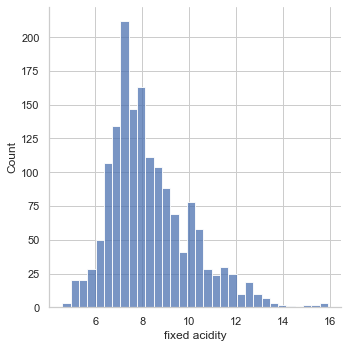

In [16]:
sns.displot(df['fixed acidity'])

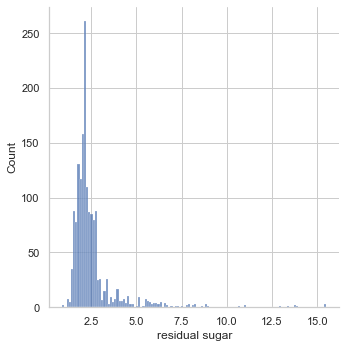

In [17]:
sns.displot(df['residual sugar'])

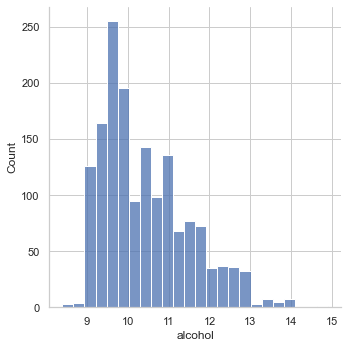

In [18]:
sns.displot(df['alcohol'])

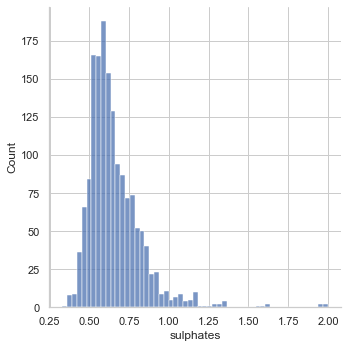

In [19]:
sns.displot(df['sulphates'])

In [20]:
df['sulphates'] = np.log(df['sulphates']);

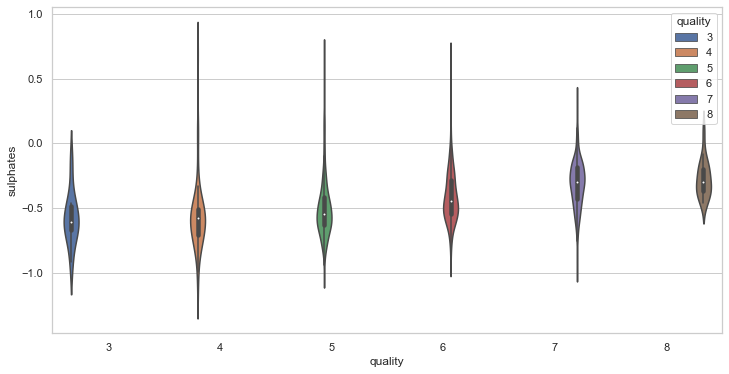

In [21]:
ax= sns.violinplot(x='quality', y='sulphates', hue='quality', data=df, palette='deep')

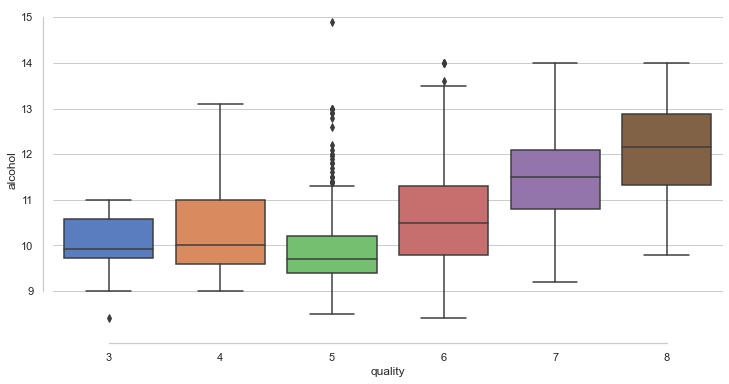

In [22]:
sns.boxplot(x='quality', y='alcohol', palette='muted', data=df)
sns.despine(offset=10, trim=True);

In [23]:
# try rescaling this column using power transformations
from scipy import stats
residual_sugar_new, sugar_lambda = stats.boxcox(df['residual sugar'])

In [24]:
residual_sugar_new

array([0.45004949, 0.5729387 , 0.5302327 , ..., 0.5302327 , 0.47338159,
       0.66041541])

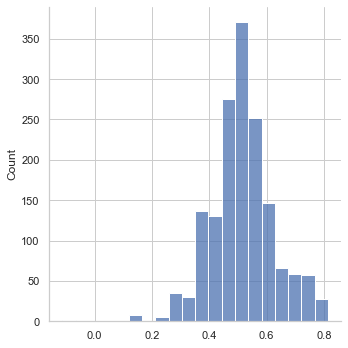

In [25]:
sns.displot(residual_sugar_new, bins=20);

In [26]:
residual_sugar_new2 = np.log(df['residual sugar']);

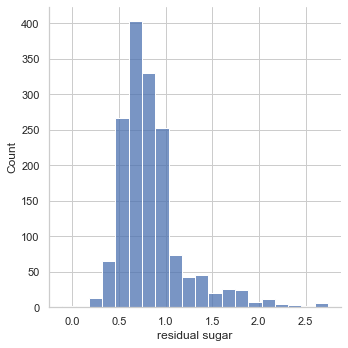

In [27]:
sns.displot(residual_sugar_new2, bins=20);

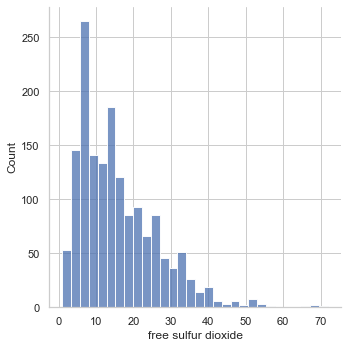

In [28]:
sns.displot(df['free sulfur dioxide']);

In [29]:
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide']);

In [30]:
df_reduced['residual sugar']=np.log(df_reduced['residual sugar'])

In [31]:
df_reduced.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.00,0.641854,11.0,0.56,9.4,5
1,7.8,0.00,0.955511,25.0,0.68,9.8,5
2,7.8,0.04,0.832909,15.0,0.65,9.8,5
3,11.2,0.56,0.641854,17.0,0.58,9.8,6
4,7.4,0.00,0.641854,11.0,0.56,9.4,5


# replace the columns with the transformations as needed

# change quality label to object, check it and set as y

In [32]:
# df_reduced['quality']=df_reduced['quality'].astype(object) # this is not necessary, causes error with sklearn

In [33]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   free sulfur dioxide  1599 non-null   float64
 4   sulphates            1599 non-null   float64
 5   alcohol              1599 non-null   float64
 6   quality              1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [34]:
y=df_reduced['quality']

In [35]:
X=df_reduced.drop(['quality'],axis=1)

In [36]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Scale all of X

In [37]:
# set scaler

scaler=MinMaxScaler()

In [38]:
X_scaled=scaler.fit_transform(X)

In [39]:
X_scaled

array([[0.24778761, 0.        , 0.26253048, 0.14084507, 0.13772455,
        0.15384615],
       [0.28318584, 0.        , 0.37273268, 0.33802817, 0.20958084,
        0.21538462],
       [0.28318584, 0.04      , 0.3296569 , 0.1971831 , 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.13      , 0.3296569 , 0.3943662 , 0.25149701,
        0.4       ],
       [0.11504425, 0.12      , 0.28055216, 0.43661972, 0.22754491,
        0.27692308],
       [0.12389381, 0.47      , 0.48706841, 0.23943662, 0.19760479,
        0.4       ]])

In [40]:
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

In [41]:
X_scaled_df.describe()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.270976,0.335743,0.209506,0.196496,0.311228
std,0.154079,0.194801,0.125586,0.147326,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.090000,0.262530,0.084507,0.131737,0.169231
50%,0.292035,0.260000,0.314039,0.183099,0.173653,0.276923
75%,0.407080,0.420000,0.372733,0.281690,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled_df,y,test_size=0.3,random_state=40)

# set up and apply the model

In [43]:
knn=KNeighborsClassifier(n_neighbors=10)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
y_pred=knn.predict(X_test)

In [46]:
y_pred

array([5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5,
       6, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 5, 7, 7, 5, 5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5,
       6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6, 5, 7, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7,

In [47]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   4,   1,   0,   0],
       [  0,   0,  11,   3,   0,   0],
       [  0,   1, 152,  46,   0,   0],
       [  0,   1,  63, 116,  13,   0],
       [  0,   0,   5,  35,  21,   0],
       [  0,   0,   1,   3,   4,   0]], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)

0.6020833333333333

In [49]:
# heatmap of confusion matrix is not useful in this case

# Find correct K

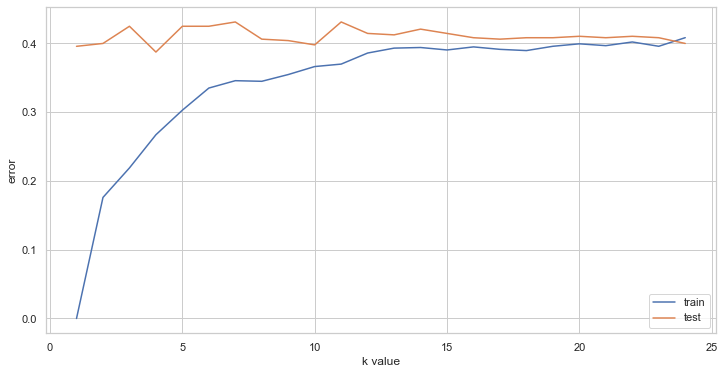

In [50]:
error_train=[]
error_test=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1))
    y_pred2=knn.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,25),error_train, label='train')
plt.plot(range(1,25),error_test, label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();

In [51]:
# from the plot we can see 5 is the best k
# best accuracy for test is 5 in this scenario

# 4.05 Activity 3

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

In [68]:
data = df[['alcohol','sulphates','quality']]

In [69]:
data_sample=data.sample(n=100, random_state=40, replace=False)

In [70]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

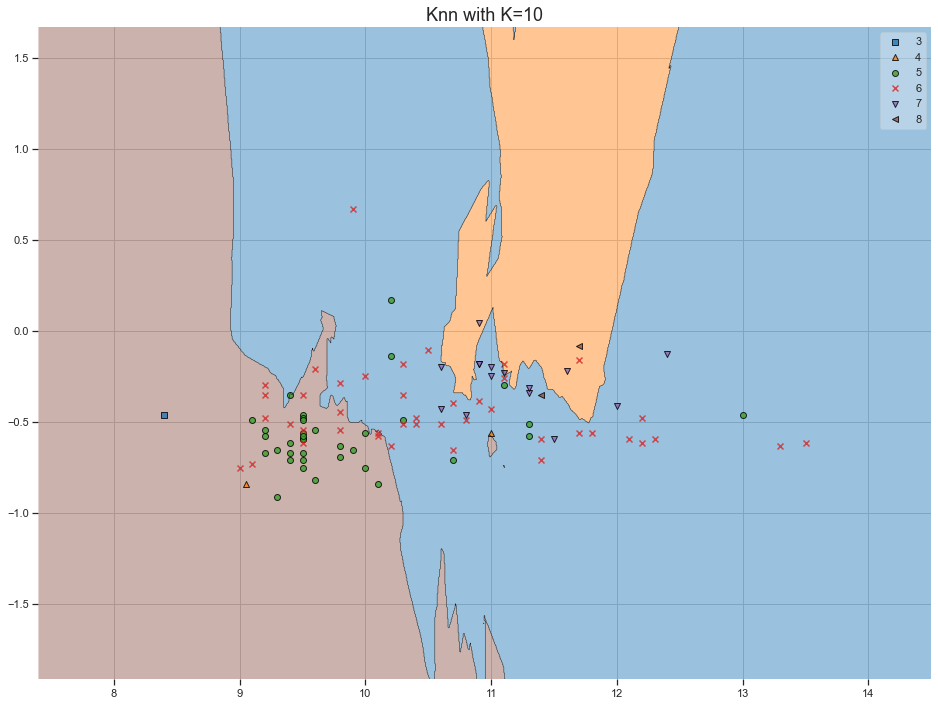

In [71]:
knn_comparison(data_sample, 10);